 #  A Whale off the Port(folio)

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [476]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [477]:
# Reading whale returns
whale_returns_csv = Path("Pandas_Resources/whale_returns.csv")
whale_returns_df = pd.read_csv(whale_returns_csv)
whale_returns_df['Date'] = pd.DatetimeIndex(whale_returns_df['Date'])
whale_returns_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [478]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [479]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [480]:
# Reading algorithmic returns
algo_returns_csv = Path("Pandas_Resources/algo_returns.csv")
algo_returns_df = pd.read_csv(algo_returns_csv)
algo_returns_df['Date'] = pd.DatetimeIndex(algo_returns_df['Date'])
algo_returns_df

,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [481]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [482]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()
algo_returns_df.isnull().sum()
algo_returns_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


## S&P 500 Returns

Read the S&P500 Historic Closing Prices and create a new daily returns DataFrame from the data. 

In [483]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Pandas_Resources/sp500_history.csv")
sp500_history_df = pd.read_csv(sp500_history_csv)
sp500_history_df['Date'] = pd.DatetimeIndex(sp500_history_df['Date'])
sp500_history_df = sp500_history_df.sort_values(by='Date')
sp500_history_df.head()

,Date,Close
1648,2012-10-01,$1444.49
1647,2012-10-02,$1445.75
1646,2012-10-03,$1450.99
1645,2012-10-04,$1461.40
1644,2012-10-05,$1460.93


In [484]:
# Check Data Types
sp500_history_df.dtypes

Date     datetime64[ns]
Close            object
dtype: object

In [485]:
# Fix Data Types
sp500_history_df["Close"] = sp500_history_df["Close"].astype("str")
sp500_history_df["Close"] = sp500_history_df["Close"].str.replace("$","")
sp500_history_df["Close"] = pd.to_numeric(sp500_history_df["Close"])
sp500_history_df.dtypes

Date     datetime64[ns]
Close           float64
dtype: object

In [486]:
# Calculate Daily Returns

sp500_history_df["Close"] = sp500_history_df["Close"].pct_change(1)
sp500_history_df

,Date,Close
1648,2012-10-01,NaN
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322
...,...,...
4,2019-04-16,0.000509
3,2019-04-17,-0.002274
2,2019-04-18,0.001579
1,2019-04-22,0.001012


In [487]:
# Drop nulls
sp500_history_df = sp500_history_df.dropna()
sp500_history_df.isnull().sum()
sp500_history_df.head()

,Date,Close
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322
1643,2012-10-08,-0.003457


In [488]:
# Rename Columns

sp500_history_df.columns = ["Date","S&P 500"]
sp500_history_df

,Date,S&P 500
1647,2012-10-02,0.000872
1646,2012-10-03,0.003624
1645,2012-10-04,0.007174
1644,2012-10-05,-0.000322
1643,2012-10-08,-0.003457
...,...,...
4,2019-04-16,0.000509
3,2019-04-17,-0.002274
2,2019-04-18,0.001579
1,2019-04-22,0.001012


## Combine Whale, Algorithmic, and S&P 500 Returns

In [489]:
# Concatenate all DataFrames into a single DataFrame


combined_df = pd.concat([whale_returns_df, algo_returns_df, sp500_history_df], axis="columns", join="inner")
combined_df.head()


,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2,Date,S&P 500
6,2015-03-10,-0.010263,-0.005341,-0.012079,-0.009739,2014-06-05,0.004062,0.013285,2019-04-12,0.006609
7,2015-03-11,0.004012,0.005163,0.003312,-0.001147,2014-06-06,0.001857,0.008284,2019-04-11,0.000038
8,2015-03-12,0.008265,0.010272,0.013117,0.010801,2014-06-09,-0.005012,0.005668,2019-04-10,0.003478
9,2015-03-13,-0.002497,-0.001428,-0.003697,-0.008142,2014-06-10,0.004406,-0.000735,2019-04-09,-0.006067
10,2015-03-16,0.007901,0.003583,0.007953,0.008055,2014-06-11,0.004760,-0.003761,2019-04-08,0.001047


---

# Portfolio Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance

Calculate and Plot the daily returns and cumulative returns. Does any portfolio outperform the S&P 500? 

In [490]:
# Plot daily returns
combined_df.plot

In [491]:
# Plot cumulative returns


## Risk

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

<AxesSubplot:>

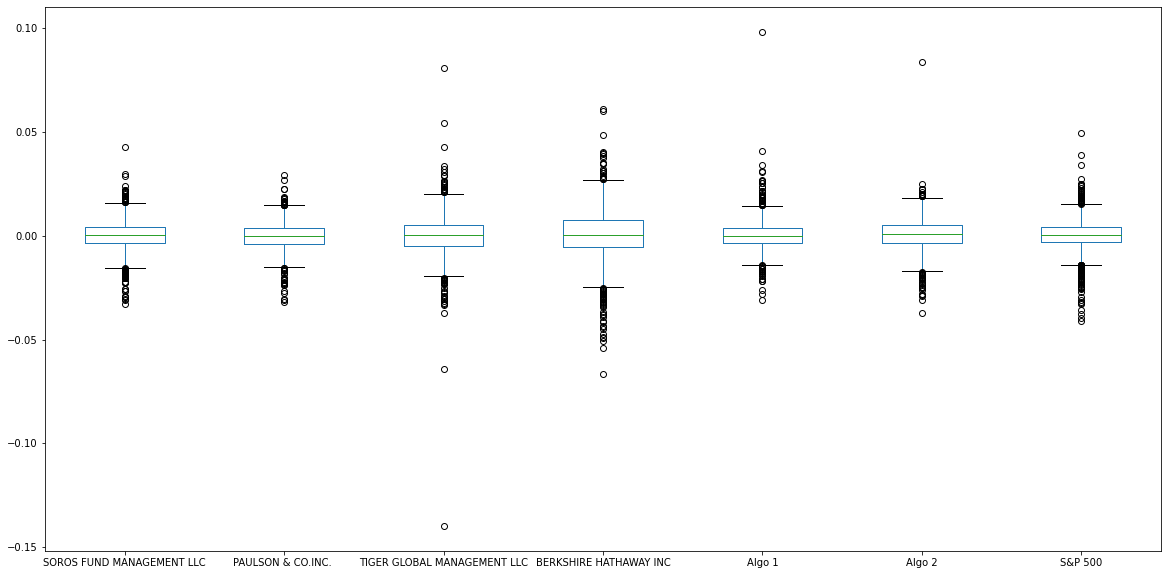

In [492]:
# Box plot to visually show risk
combined_df.plot(kind = "box", figsize = (20,10))

In [493]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
# Which portfolios are riskier than the S&P 500?
combined_df_std = pd.DataFrame(combined_df.std()).rename(columns = {0:"std"})
combined_df_std

,std
SOROS FUND MANAGEMENT LLC,0.007855
PAULSON & CO.INC.,0.006988
TIGER GLOBAL MANAGEMENT LLC,0.010845
BERKSHIRE HATHAWAY INC,0.012850
Algo 1,0.007745
Algo 2,0.008265
S&P 500,0.008529


In [494]:
# Determine which portfolios are riskier than the S&P 500
highest_std = combined_df_std[combined_df_std["std"] > combined_df_std.loc["S&P 500", "std"]]
highest_std

,std
TIGER GLOBAL MANAGEMENT LLC,0.010845
BERKSHIRE HATHAWAY INC,0.012850


In [495]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_df_std*np.sqrt(252)
annualized_std

,std
SOROS FUND MANAGEMENT LLC,0.124700
PAULSON & CO.INC.,0.110926
TIGER GLOBAL MANAGEMENT LLC,0.172156
BERKSHIRE HATHAWAY INC,0.203994
Algo 1,0.122946
Algo 2,0.131206
S&P 500,0.135386


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

<AxesSubplot:>

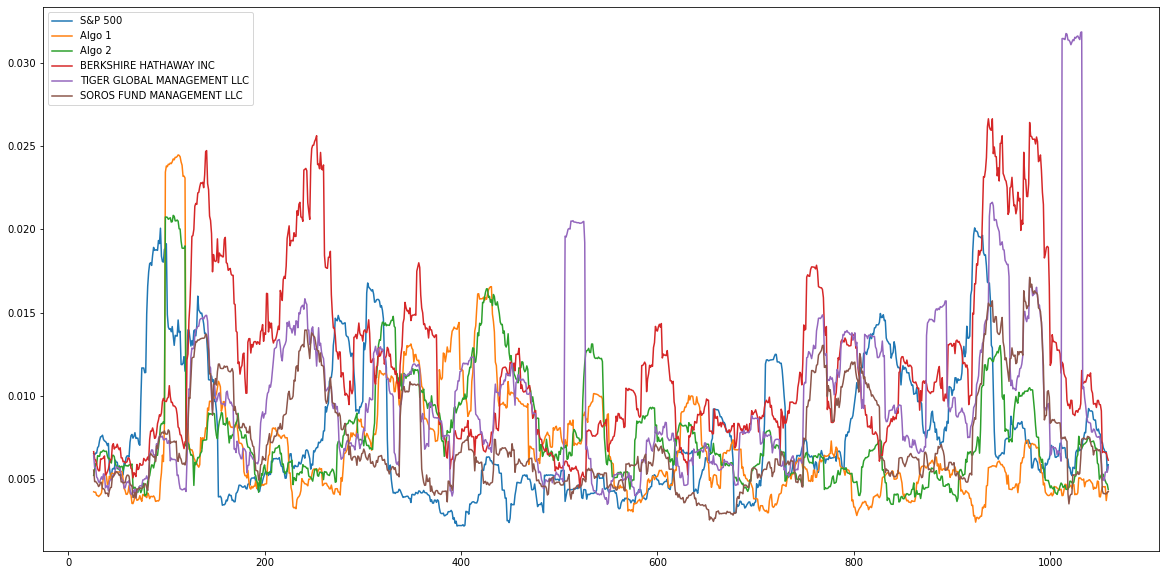

In [496]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
sp500_rolling_21D = combined_df[["S&P 500", "Algo 1", "Algo 2", "BERKSHIRE HATHAWAY INC", "TIGER GLOBAL MANAGEMENT LLC", "SOROS FUND MANAGEMENT LLC",]].rolling(window = 21).std()
sp500_rolling_21D.plot(figsize = (20,10))

In [497]:
# Construct a correlation table
correlation_sp500 = pd.DataFrame(combined_df.corr()).loc[:,"S&P 500",]
correlation_sp500[correlation_sp500==correlation_sp500[correlation_sp500<1].max()]

SOROS FUND MANAGEMENT LLC    0.060436
Name: S&P 500, dtype: float64

<AxesSubplot:xlabel='S&P 500'>

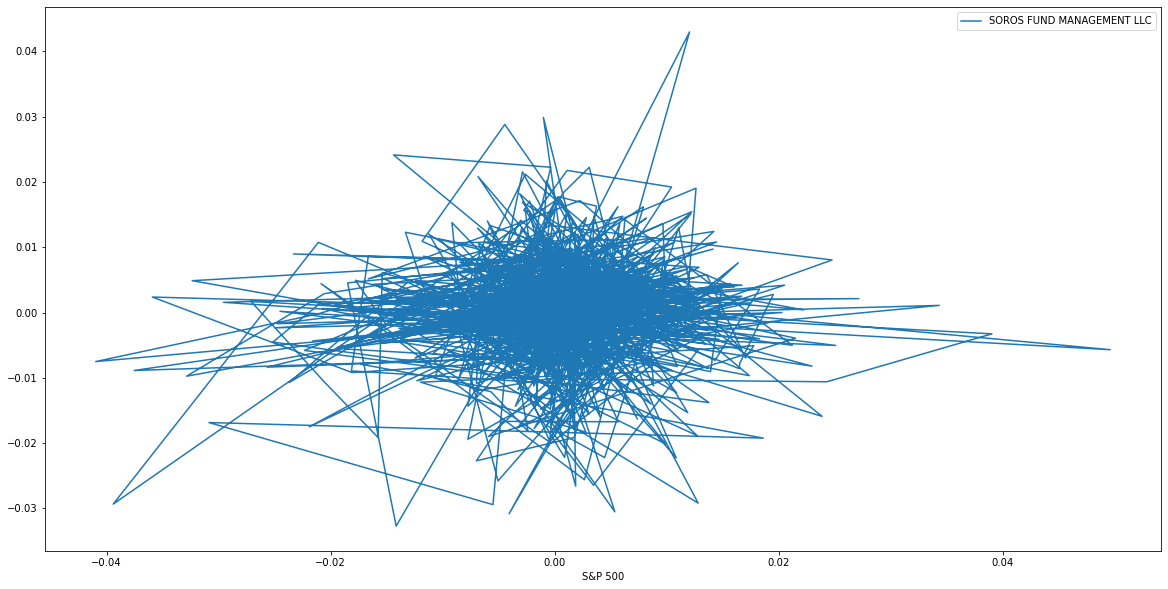

In [498]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)
combined_df.plot(kind="line", y = "SOROS FUND MANAGEMENT LLC", x = "S&P 500", figsize = (20,10))

In [499]:
# Calculate a rolling window using the exponentially weighted moving average. 


---

## Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. (After all, if you could invest in one of two portfolios, each offered the same 10% return, yet one offered lower risk, you'd take that one, right?)

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [500]:
# Calculate annualized Sharpe Ratios
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios.sort_values()

<ipython-input-500-0a149091588b>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))


PAULSON & CO.INC.             -0.470044
TIGER GLOBAL MANAGEMENT LLC   -0.113992
SOROS FUND MANAGEMENT LLC      0.367157
BERKSHIRE HATHAWAY INC         0.633782
S&P 500                        0.692287
Algo 2                         0.804573
Algo 1                         1.070733
dtype: float64

<AxesSubplot:>

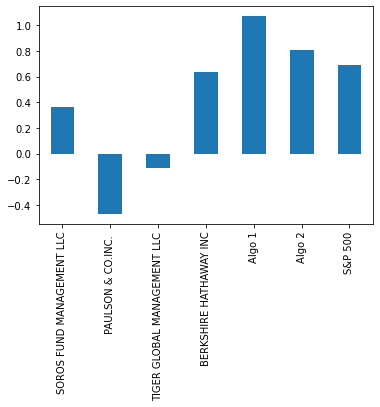

In [501]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar()

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here:

---

# Portfolio Returns

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for your own portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculate the returns for each stock.
4. Using those returns, calculate the weighted returns for your entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does your portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [502]:
# Read the first stock
aapl_history = pd.read_csv(Path("Pandas_Resources/aapl_historical.csv"))
aapl_history.rename(columns = {"Close":"aapl"}, inplace = True)
aapl_history.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [503]:
# Read the second stock
goog_history = pd.read_csv(Path("Pandas_Resources/goog_historical.csv"))
goog_history.rename(columns = {"Close":"goog"}, inplace = True)
goog_history.head(5)

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [504]:
# Read the third stock
cost_history = pd.read_csv(Path("Pandas_Resources/cost_historical.csv"))
cost_history.rename(columns = {"Close":"cost"}, inplace = True)
cost_history.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [505]:
# Concatenate all stocks into a single DataFrame
all_stocks = pd.concat((aapl_history , goog_history, cost_history), axis = 1, join= "inner")
all_stocks.sort_index(ascending = True, inplace = True)
all_stocks.head()

,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72,GOOG,5/9/2019,1162.38,COST,5/9/2019,243.47
1,AAPL,5/8/2019,202.90,GOOG,5/8/2019,1166.27,COST,5/8/2019,241.34
2,AAPL,5/7/2019,202.86,GOOG,5/7/2019,1174.10,COST,5/7/2019,240.18
3,AAPL,5/6/2019,208.48,GOOG,5/6/2019,1189.39,COST,5/6/2019,244.23
4,AAPL,5/3/2019,211.75,GOOG,5/3/2019,1185.40,COST,5/3/2019,244.62


In [509]:
# Reset the index
all_stocks.index = all_stocks.index

In [33]:
# Pivot so that each column of prices represents a unique symbol


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Drop Nulls


Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [510]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]


ValueError: Dot product shape mismatch, (1054, 10) vs (3,)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk


SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

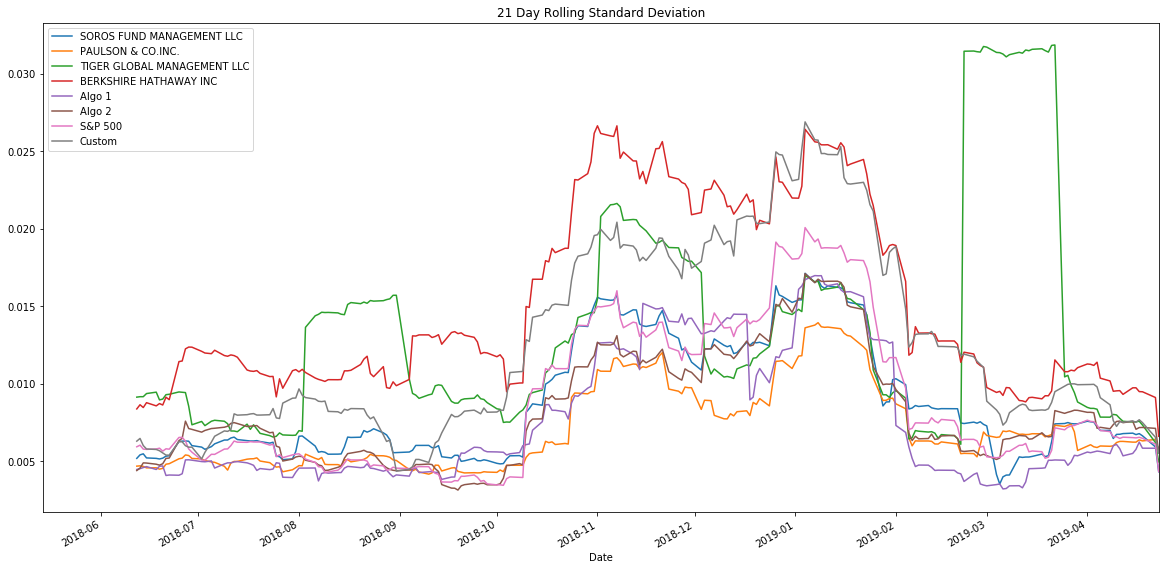

In [39]:
# Rolling


In [40]:
# Annualized Sharpe Ratios


SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

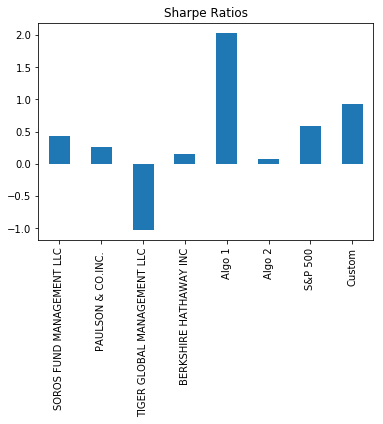

In [41]:
# Visualize the sharpe ratios as a bar plot


In [42]:
# Create a correlation analysis


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.73325
PAULSON & CO.INC.,0.791962,1,0.485375,0.650758,0.361301,0.783656,0.76668,0.64421
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1,0.325457,0.114554,0.409496,0.48103,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1,0.327,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327,1,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1,0.875721,0.739936
S&P 500,0.876981,0.76668,0.48103,0.852303,0.289358,0.875721,1,0.871875
Custom,0.73325,0.64421,0.391972,0.801158,0.261471,0.739936,0.871875,1


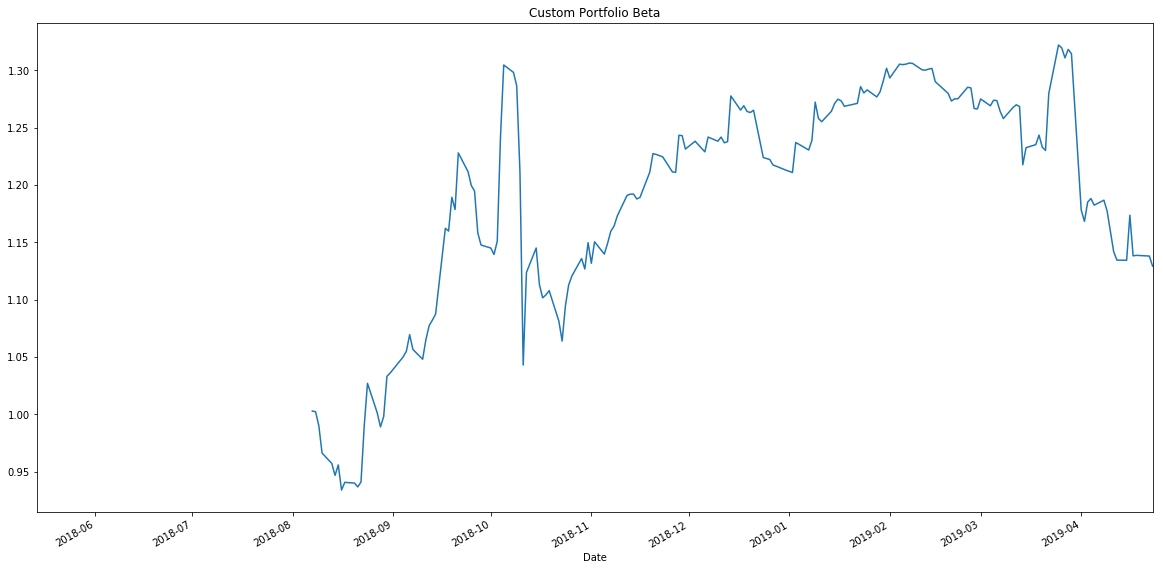

In [43]:
# Beta
